This tutorial shows you how to build a simple Michaelis-Menten two-step enzyme catalysis model in PySB. The figure below shows a conceptual overview.

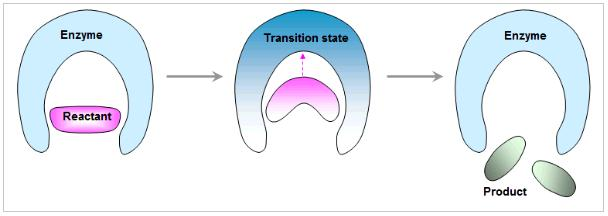

In [1]:
from IPython.display import Image
Image(filename='Lock-and-key.JPG')

1) Import essential classes from PySB

In [2]:
from pysb import * # Model, Monomer, Parameter, Initial, Rule, Observable
from pysb.macros import *

2) Create an instance of the model class. This creates an empty model to be defined interactively.

In [3]:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x1069da910>

3) Create a monomer named 'enzyme' that only has one binding site, called 'binding1'.

In [4]:
Monomer('enzyme', ['binding1'])

Monomer('enzyme', ['binding1'])

4) Create a monomer name 'protein' that has two sites. One site is the binding site called 'binding' (Remember: for sites that only take part in bond formation the state can be omitted), the other is the protein state site called 'state'. The protein state site can take two values: 'sub' and 'pro' (substrate and product).

In [5]:
Monomer('protein', ['binding', 'state'], {'state': ['sub','pro']})

Monomer('protein', ['binding', 'state'], {'state': ['sub', 'pro']})

5) Define a forward, reverse and catalysis parameters (kf, kr, kc) with the values 0.003, 0.001 and 0.002 respectively.

In [6]:
Parameter('kf',0.003)
Parameter('kr',0.001)
Parameter('kc',0.002)

Parameter('kc', 0.002)

6) Define a binding rule where the unbound enzyme binds the protein in the substrate state.

In [7]:
Rule('binding', enzyme(binding1=None) + protein(state='sub', binding=None)
     <> enzyme(binding1=1) % protein(state='sub', binding=1), kf, kr)

Rule('binding', enzyme(binding1=None) + protein(binding=None, state='sub') <> enzyme(binding1=1) % protein(binding=1, state='sub'), kf, kr)

7) Create a catalysis rule where the complex dissociates and the protein change state to product (the enzyme is left unaltered).

    Rule('catalysis', complex >> enzyme + protein in state product, catalysis_rate)

In [8]:
Rule('dissociation', enzyme(binding1=1) % protein(state='sub', binding=1) 
     >> enzyme(binding1=None) + protein(state='pro', binding=None), kc)

Rule('dissociation', enzyme(binding1=1) % protein(binding=1, state='sub') >> enzyme(binding1=None) + protein(binding=None, state='pro'), kc)

8) Define the initial conditions for the two proteins using the parameters.

In [9]:
Parameter('enzyme_0', 100)
Parameter('protein_0', 50)
Initial(enzyme(binding1=None), enzyme_0 )
Initial(protein(binding=None, state='sub') , protein_0)

9) Define the observables: total enzyme, product and the complex

In [10]:
Observable('e_total', enzyme())
Observable('e_free', enzyme(binding1=None))
Observable('substrate', protein(binding=None, state='sub'))
Observable('product', protein(binding=None, state='pro'))
Observable('complex', enzyme(binding1=1) % 
           protein(binding=1, state='sub'))

Observable('complex', enzyme(binding1=1) % protein(binding=1, state='sub'))

Finally, we run a simulation like so. Note the first line 

#### ['clang', '-fno-strict-aliasing', '-fno-common', '-dynamic', '-g', '-O2', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wall', '-Wstrict-prototypes'] #######
Missing compiler_cxx fix for UnixCCompiler


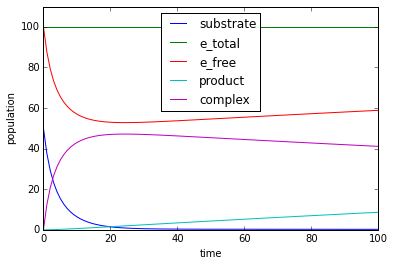

In [11]:
%matplotlib inline
from pysb.integrate import odesolve
import matplotlib.pyplot as plt
import numpy as np

tspan = np.linspace(0, 100, 100)
y = odesolve(model, tspan)

plt.plot(tspan, y['substrate'], label="substrate")
plt.plot(tspan, y['e_total'], label="e_total")
plt.plot(tspan, y['e_free'], label="e_free")
plt.plot(tspan, y['product'], label="product")
plt.plot(tspan, y['complex'], label="complex")
plt.xlabel('time')
plt.ylabel('population')
plt.ylim(0,110)
plt.legend(loc=0)
plt.show()
